# 1. Import dataset


In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from keras.optimizers import Adam
from keras.regularizers import l2
from sklearn.metrics import *
from sklearn.ensemble import GradientBoostingRegressor
import tensorflow as tf
from keras.callbacks import *

data = pd.read_excel("Rental_Fully_Prepared_For_LSTM.xlsx")
# print(data.info())
# print(data.head())

# 2. Split data and train model

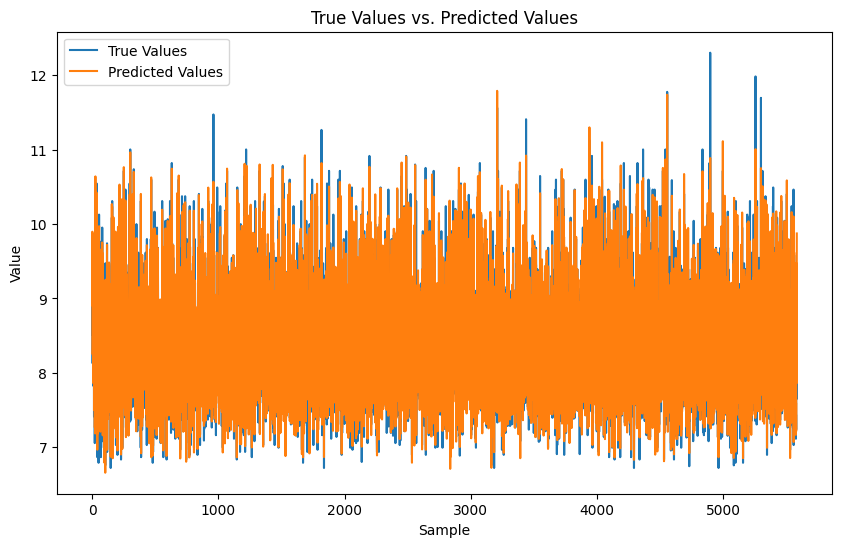

In [10]:
# Select the features for prediction
features = ['Area', 'Floor', 'Total_floor', 'Orientation', 'Longitude', 'Latitude', 'Elevators', 'Water', 'Electricity',\
            'Gas', 'Nearest subway distance', 'First area', 'Second area', 'Community name', 'Lease method',\
            'Room', 'Hall', 'Toilet', 'Availability', 'Showings time', 'Listing Year', 'Listing Month', 'Listing Day']

# Select the target variable
target = 'Price'

# Split the data into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(data[features], np.log1p(data[target]), test_size=0.3, random_state=42)
# print(test_labels)

def rmlse(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    return tf.sqrt(tf.reduce_mean(tf.square(tf.math.log1p(y_pred) - tf.math.log1p(y_true))))

# Build the model
model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=500, max_depth=5)

# Train the model
model.fit(train_data, train_labels)

# Make predictions
train_predictions = model.predict(train_data)
test_predictions = model.predict(test_data)

# Plotting the true values and predicted values
plt.figure(figsize=(10, 6))
plt.plot(range(len(test_labels)), test_labels, label='True Values')
plt.plot(range(len(test_labels)), test_predictions, label='Predicted Values')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('True Values vs. Predicted Values')
plt.legend()
plt.show()

# # Reshape the features for LSTM input
# train_data_reshaped = np.reshape(train_data.values, (train_data.shape[0], 1, train_data.shape[1]))
# test_data_reshaped = np.reshape(test_data.values, (test_data.shape[0], 1, test_data.shape[1]))

# # Build the LSTM model
# model = Sequential()
# dropout_rate = 0.65
# num_units = 300
# # model.add(Bidirectional(LSTM(16, return_sequences=True), input_shape=(1, len(features))))
# # model.add(Activation('relu'))
# # model.add(Bidirectional(LSTM(16)))
# model.add(LSTM(num_units, return_sequences=True))
# model.add(Dropout(dropout_rate))
# model.add(LSTM(num_units, return_sequences=True))
# model.add(Dropout(dropout_rate))
# model.add(LSTM(num_units))
# model.add(Dropout(dropout_rate))
# model.add(Dense(1))

# # Compile the model
# lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)
# optimizer = Adam(learning_rate=0.1)
# model.compile(optimizer=optimizer, loss="mse")

# # Train the model
# history = model.fit(train_data_reshaped, train_labels, epochs=100, validation_data=(test_data_reshaped, test_labels), callbacks=[lr_scheduler])

# # Evaluate the model
# train_loss = history.history['loss']
# val_loss = history.history['val_loss']

# # Make predictions
# epochs = np.arange(1, len(train_loss) + 1)

# # plot train loss and validation loss
# plt.figure(figsize=(10, 6))
# plt.plot(epochs, train_loss, label='Train Loss')
# plt.plot(epochs, val_loss, label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Train Loss vs. Validation Loss')
# plt.legend()
# plt.show()

# 3. Evaluate the model

MSE (tolerance=0.1): 0.03222648946551214
Accuracy (tolerance=0.1): 0.9946265448683503
Average Error Rate: 0.013551153730051821
Average Accuracy: 0.9864488462699482
Train R-squared: 0.9854296348446941
Test R-squared: 0.9524270299155629
Train RMLSE: 0.010587526057261933
Test RMLSE: 0.01872281642216131


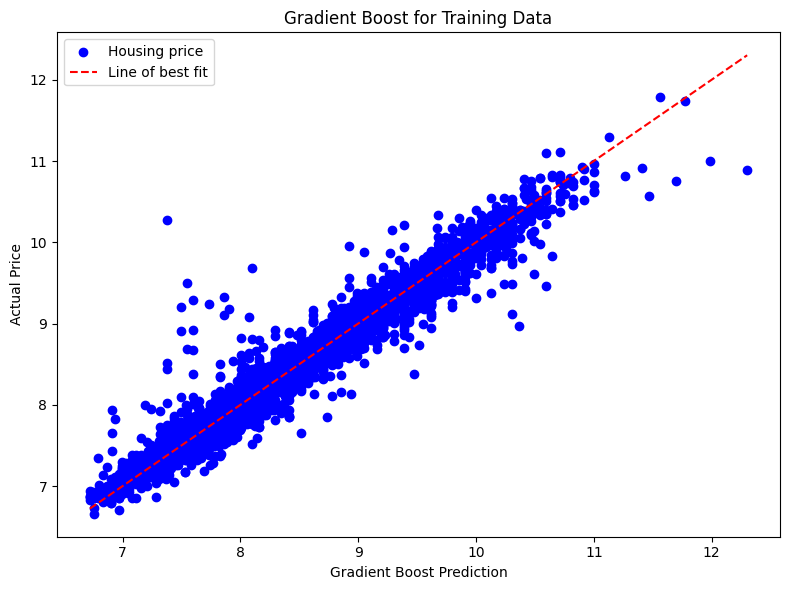


Feature Importance:
                    Feature  Importance
0                      Area    0.772820
5                  Latitude    0.147737
4                 Longitude    0.022342
2               Total_floor    0.013314
15                     Room    0.007673
17                   Toilet    0.006043
10  Nearest subway distance    0.004478
14             Lease method    0.004267
13           Community name    0.004124
12              Second area    0.004011
6                 Elevators    0.002058
1                     Floor    0.001957
16                     Hall    0.001717
21            Listing Month    0.001643
22              Listing Day    0.001511
11               First area    0.001252
3               Orientation    0.000966
20             Listing Year    0.000840
19            Showings time    0.000444
8               Electricity    0.000325
18             Availability    0.000166
9                       Gas    0.000156
7                     Water    0.000155


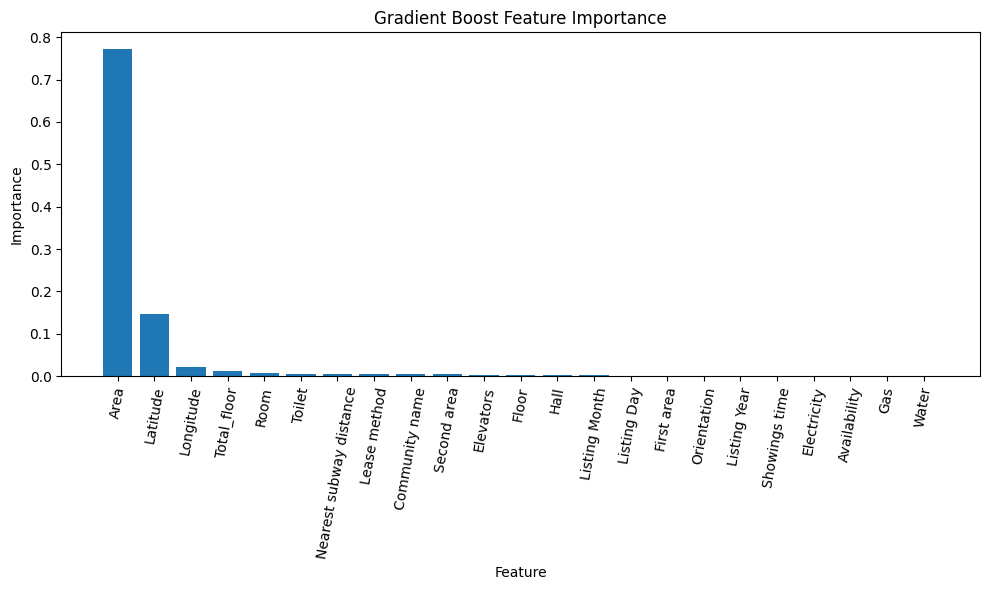

In [11]:
def calculate_accuracy(predictions, labels, tolerance=0.1):
    total = len(labels)
    mse = np.mean((labels - predictions) ** 2)
    accuracy = np.mean(np.abs(predictions - labels) / labels <= tolerance)
    print(f"MSE (tolerance={tolerance}): {mse}")
    print(f"Accuracy (tolerance={tolerance}): {accuracy}")
    return mse, accuracy

def calculate_average_error(predictions, labels):
    errors = np.abs(predictions - labels)
    error_rate = np.mean(errors / labels)
    accuracy = 1 - error_rate
    print("Average Error Rate:", error_rate)
    print("Average Accuracy:", accuracy)

def rmlse(y_true, y_pred):
    y_true = np.log1p(y_true)
    y_pred = np.log1p(y_pred)
    squared_log_errors = np.square(y_pred - y_true)
    mean_squared_log_error = np.mean(squared_log_errors)
    rmlse = np.sqrt(mean_squared_log_error)
    return rmlse

# Calculate accuracy
calculate_accuracy(test_predictions, test_labels)
calculate_average_error(test_predictions, test_labels)
train_r2 = r2_score(train_labels, train_predictions)
test_r2 = r2_score(test_labels, test_predictions)
train_rmlse = rmlse(train_labels, train_predictions)
test_rmlse = rmlse(test_labels, test_predictions)

print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train RMLSE:", train_rmlse)
print("Test RMLSE:", test_rmlse)

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(test_labels, test_predictions, color='blue', label='Housing price')
ax.plot([test_labels.min(), test_labels.max()], [test_labels.min(), test_labels.max()], 'r--', label='Line of best fit')
ax.set_title('Gradient Boost for Training Data')
ax.set_xlabel('Gradient Boost Prediction')
ax.set_ylabel('Actual Price')
ax.legend()
plt.tight_layout()
plt.show()

feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=80)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Gradient Boost Feature Importance')
plt.tight_layout()
plt.show()

# Print actual prices and predictions
# for actual_price, prediction in zip(test_labels, test_predictions):
#     print(f"Actual Price: {actual_price}, Predicted Price: {prediction}")

# # Make predictions
# predictions = model.predict(test_data_reshaped)
# print("Predictions shape:", predictions.shape)

# Calculate accuracy

# # Flatten the arrays for easier printing
# test_labels = test_labels.flatten()
# predictions = predictions.flatten()

